# ***Spark Foundation***

# Name:- Nilesh Shashikant Patil

### Task 1:- Predict The Percentage of an student based on the number of study hours

##  ***Simple Linear Regression***

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

In [2]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, ' Study Hours Vs Scores')

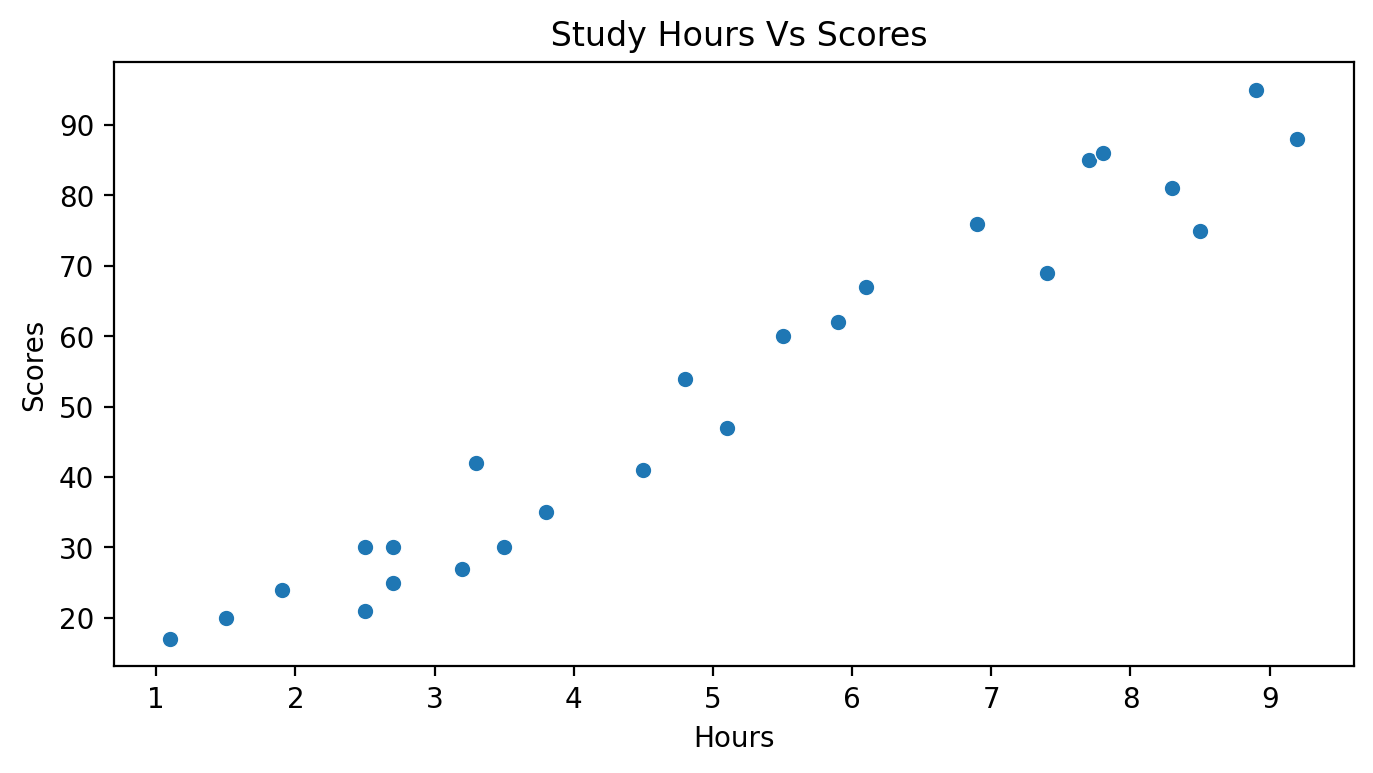

In [7]:
plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(data=df,x='Hours',y='Scores')
plt.title(' Study Hours Vs Scores')

## Preparing Data

In [8]:
X = df.drop('Scores',axis=1)

In [9]:
y = df['Scores']

In [10]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [11]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

## Train | Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Creating a Model (Estimator)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

### Fit/Train the Model on the training data

In [16]:
model.fit(X_train,y_train)

LinearRegression()

### Calculate Performance on Test Set

In [25]:
test_pred = model.predict(X_test)
test_pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

In [33]:
model.coef_

array([9.71409219])

In [34]:
model.intercept_

2.480367091505748

In [26]:
# Compairing actual and Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred})  
df1

,Actual,Predicted
8,81,83.107332
16,30,26.765598
0,21,26.765598
23,76,69.507603
11,62,59.793511
9,25,28.708416
13,42,34.536871


## Let's predict the score for 9.30 hours

In [27]:
print("The score of student who studied for 9.30 hours a day ",model.predict([[9.30]]))

The score of student who studied for 9.30 hours a day  [92.82142448]


## Model Evaluation Metrics

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [29]:
MAE = mean_absolute_error(y_test,test_pred)
MSE = mean_squared_error(y_test,test_pred)
RMSE = np.sqrt(MSE)

In [30]:
MAE

4.425394675156183

In [31]:
RMSE

4.8493706843873285